## Imports


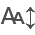

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

## Loading data

In [34]:
data = pd.read_excel(
    "../data/who_aap_2021_v9_11august2022.xlsx", sheet_name="AAP_2022_city_v9"
)
data.columns = [
    "WHO Region",
    "ISO3",
    "WHO Country Name",
    "City or Locality",
    "Measurement Year",
    "PM2.5",
    "PM10",
    "NO2",
    "PM2.5 temporal coverage",
    "PM10 temporal coverage",
    "NO2 temporal coverage",
    "Reference",
    "Number and type of monitoring stations",
    "Version of the database",
    "Status",
]
data

WHO Region ISO3 WHO Country Name City or Locality  \
0      Eastern Mediterranean Region  AFG      Afghanistan            Kabul   
1                   European Region  ALB          Albania           Durres   
2                   European Region  ALB          Albania           Durres   
3                   European Region  ALB          Albania          Elbasan   
4                   European Region  ALB          Albania          Elbasan   
...                             ...  ...              ...              ...   
32186                African Region  ZAF     South Africa       West Coast   
32187                African Region  ZAF     South Africa       West Coast   
32188                African Region  ZAF     South Africa       West Coast   
32189                African Region  ZAF     South Africa       West Coast   
32190                African Region  ZAF     South Africa        West Rand   

       Measurement Year   PM2.5   PM10    NO2  PM2.5 temporal coverage  \
0                  2019  119.77    NaN    NaN                     18.0   
1                  2015     NaN  17.65  26.63                      NaN   
2                  2016   14.32  24.56  24.78                      NaN   
3                  2015     NaN    NaN  23.96                      NaN   
4                  2016     NaN    NaN  26.26                      NaN   
...                 ...     ...    ...    ...                      ...   
32186              2015    7.47  24.64   7.64                     75.0   
32187              2016    8.42  33.28   7.27                     75.0   
32188              2017    6.83  20.49   8.72                     75.0   
32189              2018    6.10  17.99   7.15                     75.0   
32190              2016     NaN    NaN  17.85                      NaN   

       PM10 temporal coverage  NO2 temporal coverage  \
0                         NaN                    NaN   
1                         NaN              83.961187   
2                         NaN              87.932605   
3                         NaN              97.853881   
4                         NaN              96.049636   
...                       ...                    ...   
32186                    75.0              75.000000   
32187                    75.0              75.000000   
32188                    75.0              75.000000   
32189                    75.0              75.000000   
32190                     NaN              75.000000   

                                               Reference  \
0      U.S. Department of State, United States Enviro...   
1       European Environment Agency (downloaded in 2021)   
2       European Environment Agency (downloaded in 2021)   
3       European Environment Agency (downloaded in 2021)   
4       European Environment Agency (downloaded in 2021)   
...                                                  ...   
32186       South African Air Quality Information System   
32187       South African Air Quality Information System   
32188       South African Air Quality Information System   
32189       South African Air Quality Information System   
32190       South African Air Quality Information System   

      Number and type of monitoring stations  Version of the database  Status  
0                                        NaN                     2022     NaN  
1                                        NaN                     2022     NaN  
2                                        NaN                     2022     NaN  
3                                        NaN                     2022     NaN  
4                                        NaN                     2022     NaN  
...                                      ...                      ...     ...  
32186      3 Residential-Medium/Upper income                     2022     NaN  
32187      2 Residential-Medium/Upper income                     2022     NaN  
32188      2 Residential-Medium/Upper income                     2022     NaN  
32189

## Data review

#### Basic statistics

In [35]:
data.describe()

Measurement Year         PM2.5          PM10           NO2  \
count      32191.000000  15048.000000  21109.000000  22200.000000   
mean        2015.579354     22.920320     30.533252     20.619336   
std            2.752654     17.925906     29.312756     12.133388   
min         2000.000000      0.010000      1.040000      0.000000   
25%         2014.000000     10.350000     16.980000     12.000000   
50%         2016.000000     16.000000     22.000000     18.800000   
75%         2018.000000     31.000000     31.300000     27.160000   
max         2021.000000    191.900000    540.000000    210.680000   

       PM2.5 temporal coverage  PM10 temporal coverage  NO2 temporal coverage  \
count              7275.000000             5381.000000           19890.000000   
mean                 90.794096               90.583500              93.696804   
std                  14.872681               13.816311              10.451751   
min                   0.000000                2.568493               1.923077   
25%                  88.595890               87.945205              93.207763   
50%                  97.000000               96.039000              96.369863   
75%                  99.000000               98.938000              98.926941   
max                 100.000000              100.000000             100.000000   

       Version of the database  Status  
count             32191.000000     0.0  
mean               2021.744214     NaN  
std                   1.051897     NaN  
min                2016.000000     NaN  
25%                2022.000000     NaN  
50%                2022.000000     NaN  
75%                2022.000000     NaN  
max                2022.000000     NaN

#### NAs

In [36]:
data.isna().sum()

WHO Region                                    1
ISO3                                          0
WHO Country Name                              0
City or Locality                              0
Measurement Year                              0
PM2.5                                     17143
PM10                                      11082
NO2                                        9991
PM2.5 temporal coverage                   24916
PM10 temporal coverage                    26810
NO2 temporal coverage                     12301
Reference                                     5
Number and type of monitoring stations    23433
Version of the database                       0
Status                                    32191
dtype: int64

#### Relation between variables

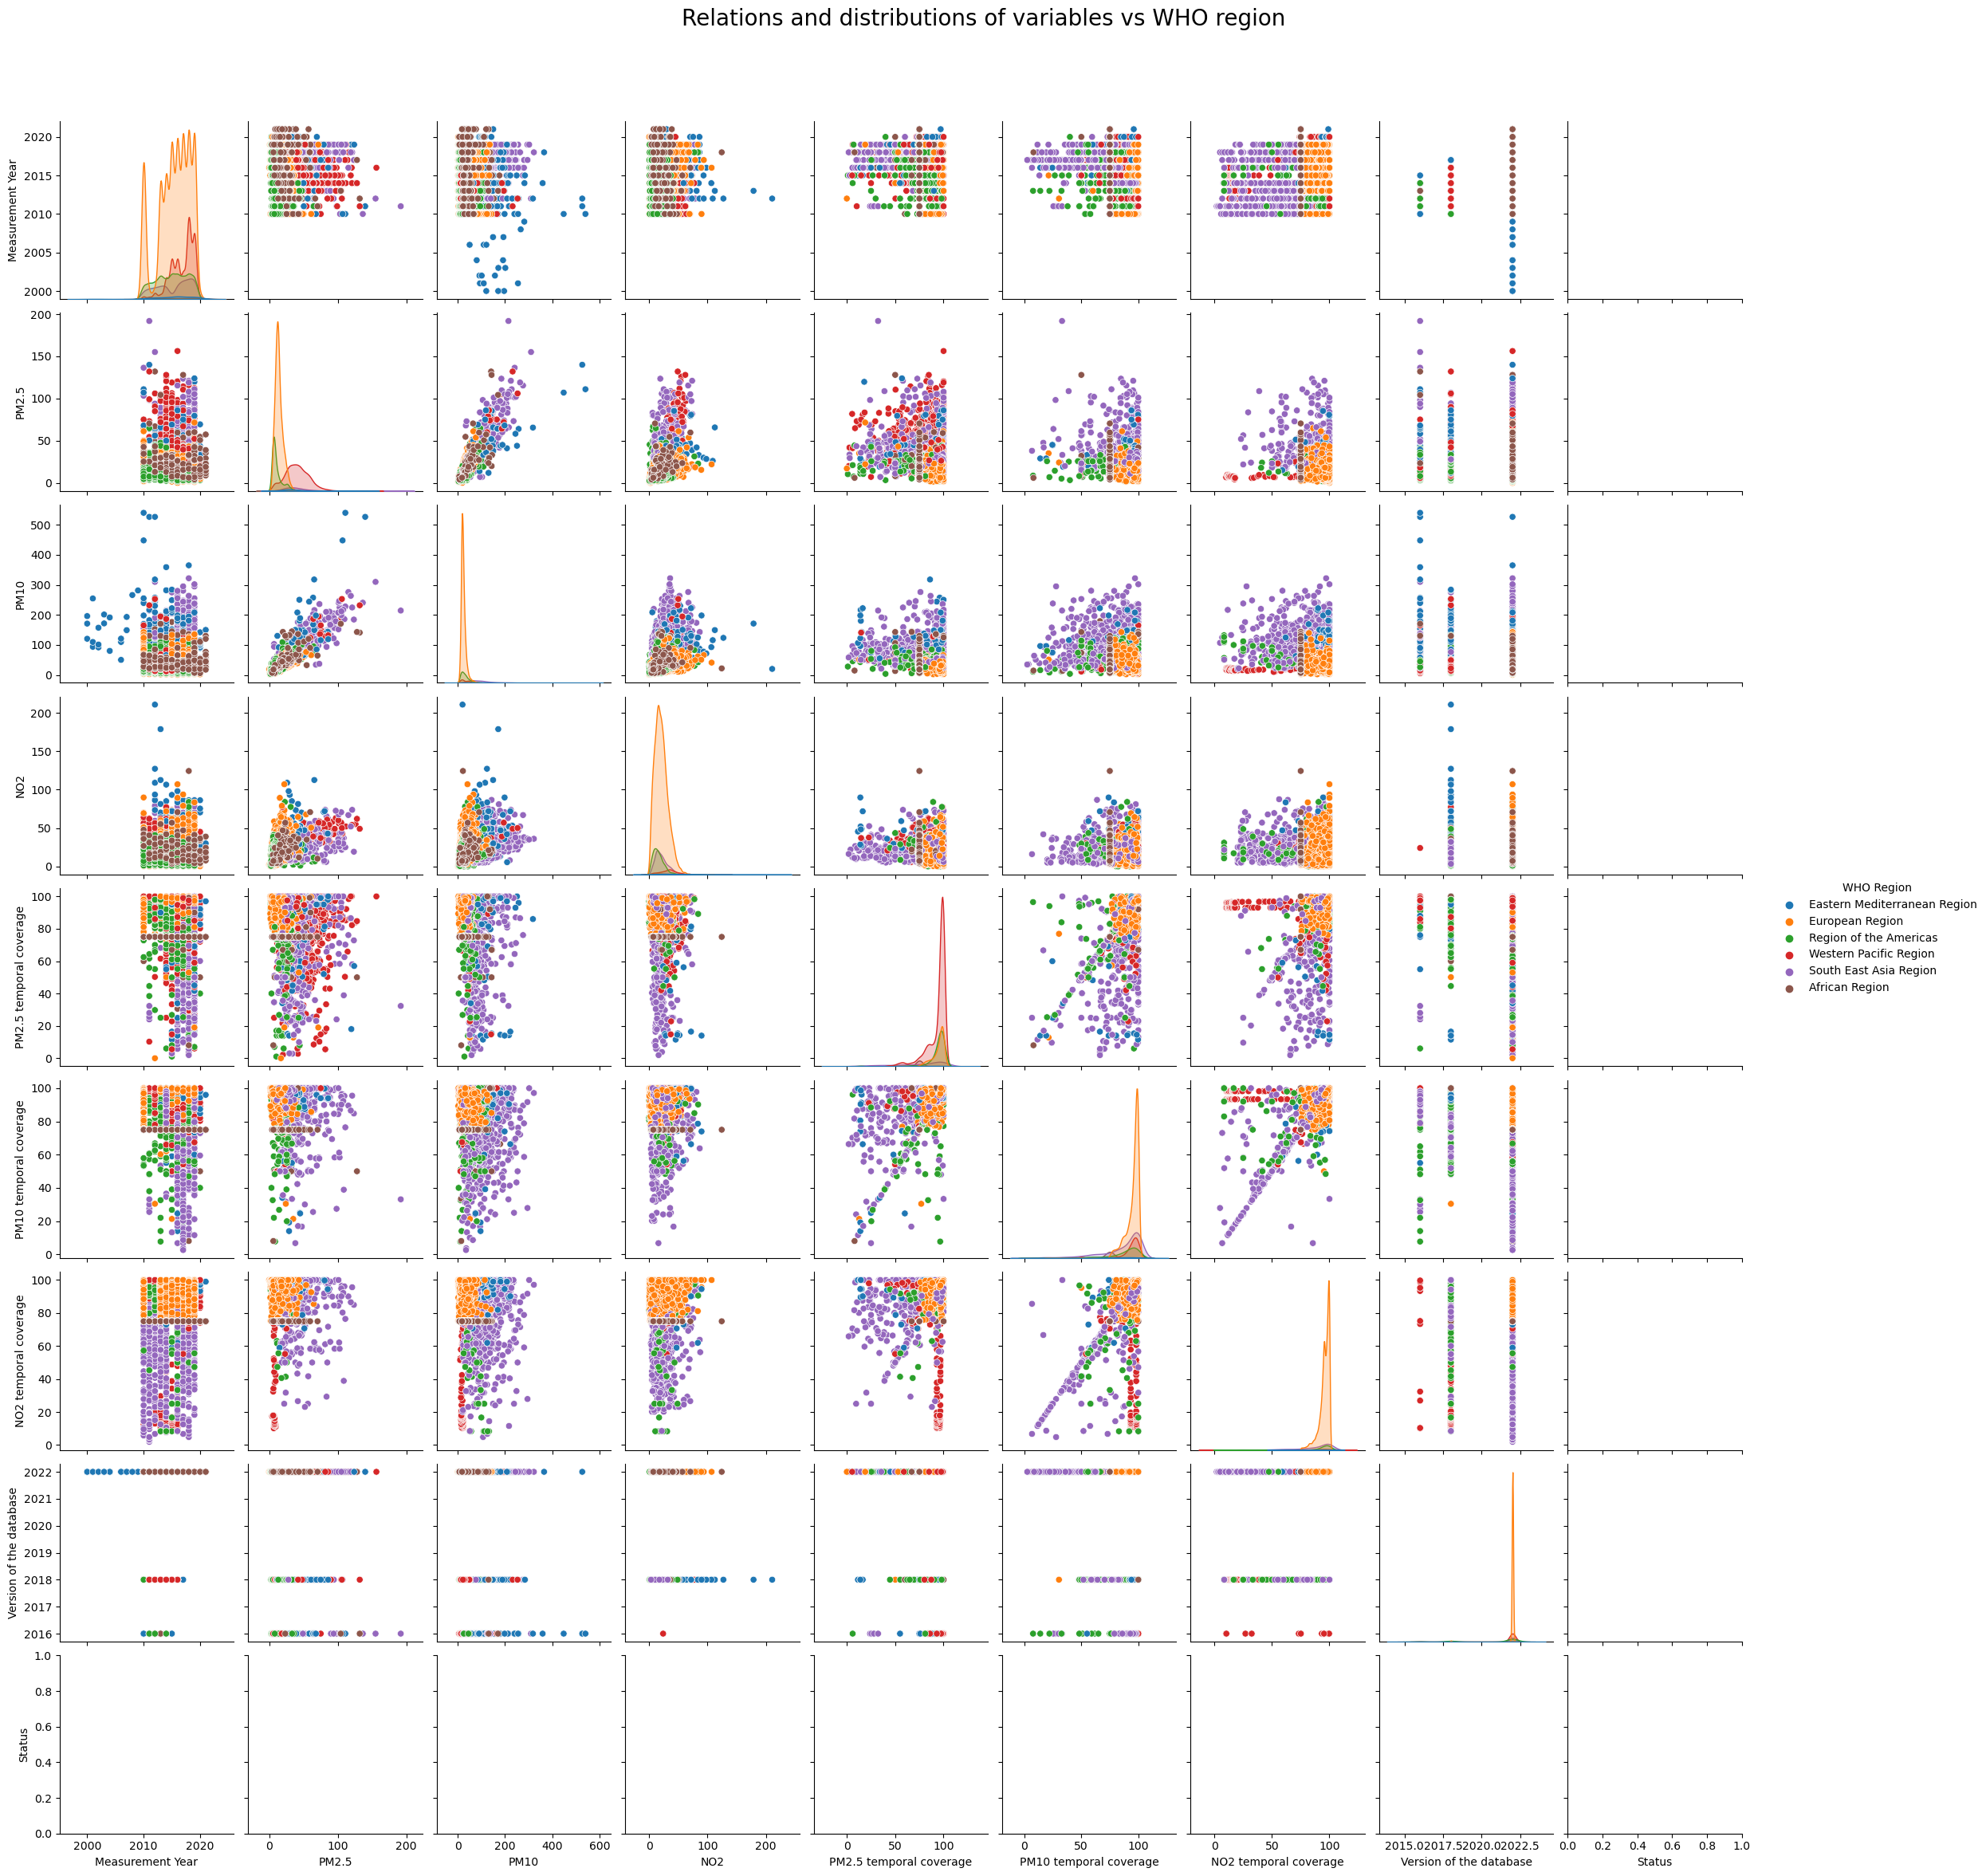

In [37]:
sns.pairplot(data, hue="WHO Region").fig.suptitle(
    "Relations and distributions of variables vs WHO region", y=1.05, fontsize=20
)
plt.show()

In [38]:
# TODO FIRSTLY
# uzupelnic NAs w reference - jesli juz w jakims roku dla danego miasta bylo info to wypelnic tym reszte
# uzupelnic NA w WHO Region (Lichtenstein)

# TODO SECONDLY
# histogramy z podzialem na WHO Region
# wykres korelacji miedzy wartoscami pm2.5, pm10, no2
# nowe zmienne is_Europe, is_America, is_Asia, is_Africa i z tym korelacje i wykresy
# nowa zmienna ilosc stacji - na podstawie ilosci zmiennych poprzecinku oraz numerow w number and type...
# powtorzyc dla krajow, moze miast (moze np skupic sie na polsce)

# TODO THIRDLY
# zwizualizowac na mapie swiata, kazdego kontynentu wartości pm2.5 oraz pm10 (hue i size) dla kazdego kraju, miasta